# Final Project SQL & Data Wrangling - Sekolah Data PACMANN

Oleh: Denny Dewanta

Penjelasan lebih detail ada pada Medium: </br>
https://medium.com/@dedewanta/analisis-e-commerce-olist-3669e813f502

## Import Libraries

In [1125]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

## Functions

Fungsi-fungsi yang dipakai pada notebook ini.

In [1126]:
# Store Dataframe
def store_df(table_name):
    cr = conn.cursor()
    query = '''SELECT * FROM ''' + table_name
    cr.execute(query)
    res = cr.fetchall()
    cols = [col[0] for col in cr.description]
    return pd.DataFrame(res, columns = cols).drop('index', axis=1)

In [1127]:
# Outliers Detection
def detect_outliers(table, added_columns):
    outlier_check = pd.DataFrame(data = table, columns = added_columns)
    fig = sns.set(rc={'figure.figsize':(10,5)})
    fig = sns.boxplot(x="value", y="variable", data=pd.melt(outlier_check), orient="h")
    return fig

## 1. Objectives

1. Perusahaan ingin mengetahui payment type terbanyak </br>
2. Perusahaan ingin mengetahui lima kategori produk dengan penjualan terbanyak </br>
3. Perusahaan ingin mengetahui top 10 sellers berdasarkan jumlah penjualan terbanyak </br>
4. Perusahaan ingin mengetahui pertumbuhan sales produk bed bath table dalam bulanan selama 2018 </br>
5. Perusahaan ingin mengetahui pertumbuhan sales produk health beauty dalam bulanan selama 2018 </br>

## 2. Mengakses Dataset

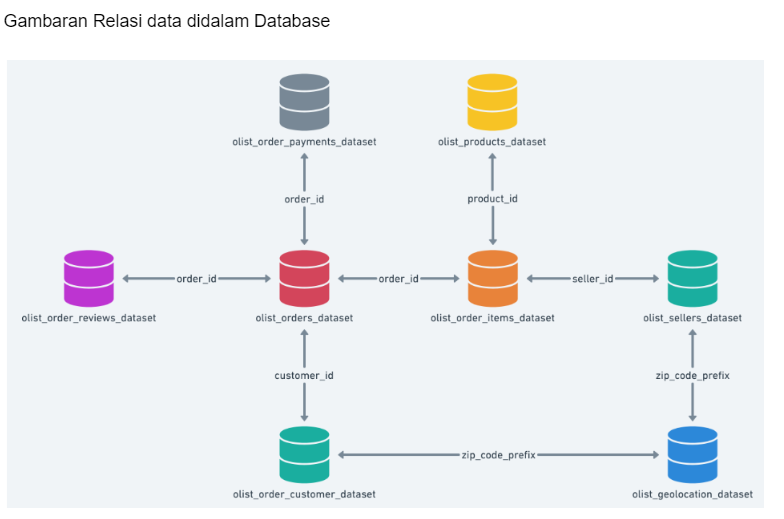

In [1128]:
conn = sqlite3.connect("olist.db")

In [1129]:
df_order_items = store_df('olist_order_items_dataset')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [1130]:
df_category = store_df('product_category_name_translation')
df_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [1131]:
df_products = store_df('olist_products_dataset')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [1132]:
df_order_pay = store_df('olist_order_payments_dataset')
df_order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1133]:
df_order_reviews = store_df('olist_order_reviews_dataset')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [1134]:
df_orders = store_df('olist_order_dataset')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## 3. Eksplorasi dan Pemrosesan Data

### 3.1 Karakteristik Tabel

Cek karakteristik tiap-tiap tabel agar dapat memahami lebih dalam

In [1135]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [1136]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [1137]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [1138]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [1139]:
df_order_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [1140]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### 3.2 Outliers Handling

### df_products:

<AxesSubplot:xlabel='value', ylabel='variable'>

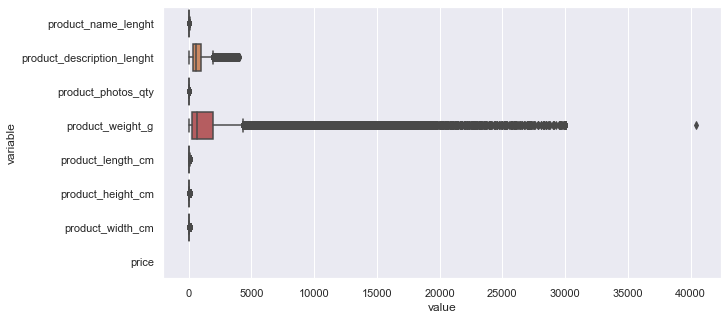

In [1141]:
# Outliers detection on df_products
columns = ['product_name_lenght','product_description_lenght',
           'product_photos_qty','product_weight_g',
           'product_length_cm','product_height_cm',
           'product_width_cm', 'price']
detect_outliers(df_products, columns)

Terdapat outliers pada product weight. Akan didrop

In [1142]:
# Mencari nilai outlier
df_products['product_weight_g'].max()

40425.0

In [1143]:
# Drop
df_products.drop(df_products[df_products["product_weight_g"]==40425.0].index, inplace=True)

<AxesSubplot:xlabel='value', ylabel='variable'>

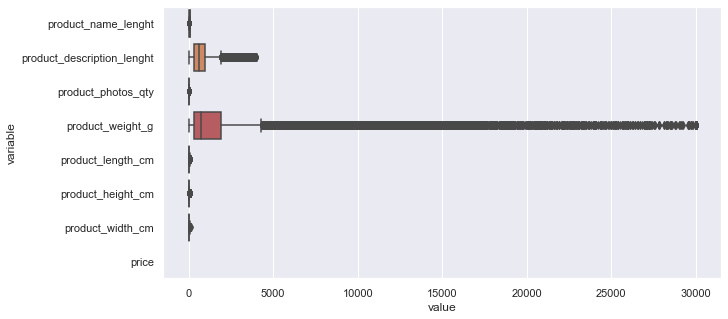

In [1144]:
# Cek lagi
detect_outliers(df_products, columns)

### df_order_items:

<AxesSubplot:xlabel='value', ylabel='variable'>

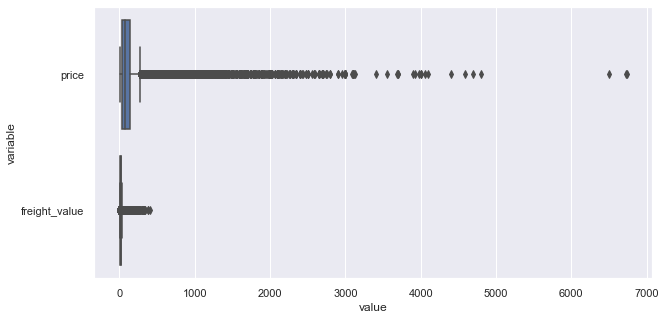

In [1145]:
columns = ['price', 'freight_value']
detect_outliers(df_order_items, columns)

Pada price terdapat outliers. Namun, outliers ini tidak akan didrop karena dapat memuat informasi penting yang berguna ketika analisis data.

### 3.3 Missing Value Handling

### Pada df_products:

In [1146]:
df_products.isna().sum() / len(df_products) * 100

product_id                    0.00000
product_category_name         1.85129
product_name_lenght           1.85129
product_description_lenght    1.85129
product_photos_qty            1.85129
product_weight_g              0.00607
product_length_cm             0.00607
product_height_cm             0.00607
product_width_cm              0.00607
dtype: float64

In [1147]:
# impute missing values menggunakan median
df_products["product_weight_g"].fillna(df_products["product_weight_g"].median(), inplace=True)
df_products["product_length_cm"].fillna(df_products["product_length_cm"].median(), inplace=True)
df_products["product_height_cm"].fillna(df_products["product_height_cm"].median(), inplace=True)
df_products["product_width_cm"].fillna(df_products["product_width_cm"].median(), inplace=True)

In [1148]:
# Drop missing values
df_products.dropna()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


### 3.4 Mengganti Product Category ke Dalam Bahasa Inggris

Agar mudah dipahami.

In [1149]:
#  Left join agar nama kategori menjadi bahasa Inggris.
# Namun, perlu dicek dengan outer join apakah ada kategori yang belum tercatat di kedua bahasa
left_join_product = df_products.merge(df_category, how='left', on='product_category_name', indicator=True)
left_outer = left_join_product[left_join_product['_merge'] == 'left_only']

# Terdapat dua products yg belum ada di table product category
left_outer['product_category_name'].unique()

array([None, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype=object)

pc_gamer dan portateis_cozinha_e_preparadores_de_alimentos tidak ada di dalam inner join.

In [1150]:
# Menambahkan daftar products yang belum ada ke dalam table products_category
df_category.loc[len(df_category.index)] = ['pc_gamer','pc_gamer'] 
df_category.loc[len(df_category.index)] = ['portateis_cozinha_e_preparadores_de_alimentos','portable kitchen food preparation']

In [1151]:
# Setelah table product category lengkap maka melakukan join table products dengan product_category
df_products2 = df_products.merge(df_category, how='left', on='product_category_name')
df_products2

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32945,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32946,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32947,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32948,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [1152]:
# Drop kategori bahasa spanyol dan rename
df_products2.drop('product_category_name', axis=1, inplace=True)
df_products2.rename(columns = {'product_category_name_english':'product_category_name'}, inplace = True)

In [1153]:
# Menjadikan df_products2 menjadi df_products
df_products = df_products2
df_products

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32945,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32946,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32947,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32948,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


### 3.5 Check Duplicated Data

In [1154]:
df_orders.duplicated().any()

False

In [1155]:
df_products.duplicated().any()

False

In [1156]:
df_order_pay.duplicated().any()

False

In [1157]:
df_order_items.duplicated().any()

False

Ternyata tidak ditemukan duplicated data.

### 3.6 Handling Inconsistent Format

In [1158]:
df_products['product_category_name'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

In [1159]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

### 3.7 Join Dataframe

In [1160]:
# join dataframe
df = df_order_items.merge(df_products, 
                          how='left',
                          on='product_id'
                         )
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [1161]:
# merge dengan order review
df = df.merge(df_order_reviews,
              how='left',
              on='order_id'
             )
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,...,product_length_cm,product_height_cm,product_width_cm,product_category_name,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,...,28.0,9.0,14.0,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5.0,None,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,...,50.0,30.0,40.0,pet_shop,7b07bacd811c4117b742569b04ce3580,4.0,None,None,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,...,33.0,13.0,33.0,furniture_decor,0c5b33dea94867d1ac402749e5438e8b,5.0,None,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,...,16.0,10.0,15.0,perfumery,f4028d019cb58564807486a6aaf33817,4.0,None,None,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,...,35.0,40.0,30.0,garden_tools,940144190dcba6351888cafa43f3a3a5,5.0,None,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [1162]:
# merge df dengan order payments
df = df.merge(df_order_pay,
              how='left',
              on='order_id'
             )
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,...,97ca439bc427b48bc1cd7177abe71365,5.0,None,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,...,7b07bacd811c4117b742569b04ce3580,4.0,None,None,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,...,0c5b33dea94867d1ac402749e5438e8b,5.0,None,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,...,f4028d019cb58564807486a6aaf33817,4.0,None,None,2018-08-15 00:00:00,2018-08-15 16:39:01,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,...,940144190dcba6351888cafa43f3a3a5,5.0,None,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,1.0,credit_card,3.0,218.04


In [1163]:
# merge df dengan order
df = df.merge(df_orders,
              how='left',
              on='order_id'
             )
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,...,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,...,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,...,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,...,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,...,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,...,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [1164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   product_name_lenght            116598 non-null  float64
 8   product_description_lenght     116598 non-null  float64
 9   product_photos_qty             116598 non-null  float64
 10  product_weight_g               118307 non-null  float64
 11  product_length_cm              118307 non-null  float64
 12  product_height_cm             

### 3.8 Data Type Handling

In [1165]:
# Karena terdapat tipe data yang salah (seharusnya bertipe data datetime)
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

In [1166]:
df.isna().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_name_lenght                1712
product_description_lenght         1712
product_photos_qty                 1712
product_weight_g                      3
product_length_cm                     3
product_height_cm                     3
product_width_cm                      3
product_category_name              1712
review_id                           978
review_score                        978
review_comment_title             104418
review_comment_message            68628
review_creation_date                978
review_answer_timestamp             978
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3


In [1167]:
# Membuat kolom baru khusus untuk tahun dan bulan untuk analisis
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month
df['day'] = df['order_purchase_timestamp'].dt.weekday
df['hour'] = df['order_purchase_timestamp'].dt.hour

## 4. Analisis

### 4.1 Payment type terbanyak:

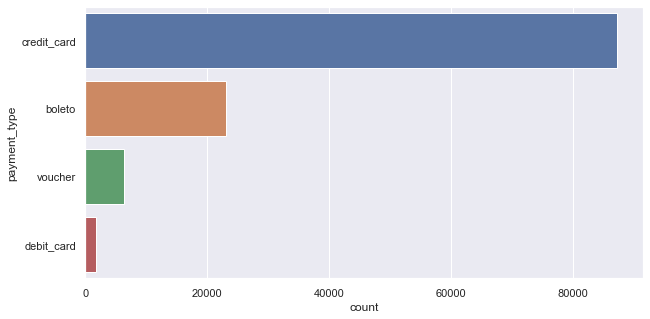

In [1168]:
fig1 = sns.countplot(y=df['payment_type'], data=df.payment_type,
                     order=df['payment_type'].value_counts().index)

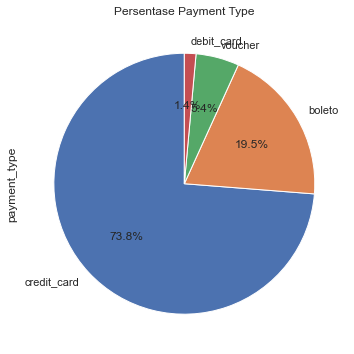

In [1169]:
fig2 = df['payment_type'].value_counts().plot(kind='pie', startangle=90, title='Persentase Payment Type',
                                              figsize=(6,6), autopct='%1.1f%%')

### 4.2 Lima kategori produk yang paling banyak dibeli

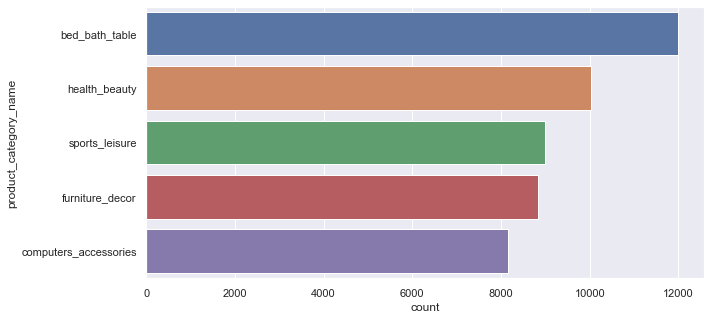

In [1170]:
fig3 = sns.countplot(y=df['product_category_name'], data=df.product_category_name ,
                     order=df['product_category_name'].value_counts().iloc[:5].index)

### 4.3 Top 10 Seller berdasarkan jumlah barang terjual

C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


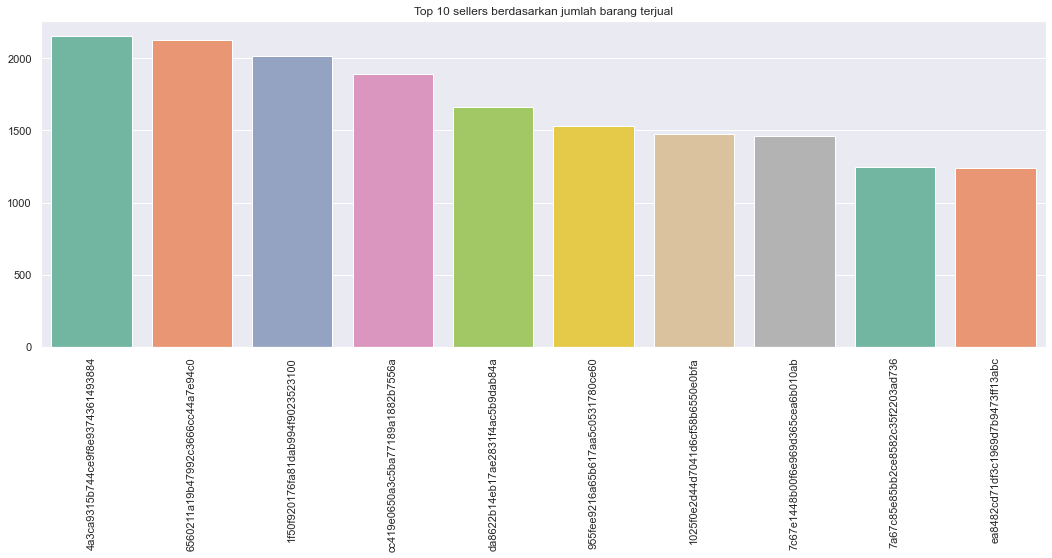

In [1171]:
plt.figure(figsize=(18,6))
ax=sns.barplot(df['seller_id'].value_counts()[:10].index,df['seller_id'].value_counts()[:10].values,palette='Set2')
ax.set_title('Top 10 sellers berdasarkan jumlah barang terjual')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### 4.4 Pertumbuhan order bulanan dari produk bed_bath_table tahun 2018

In [1172]:
# Memilih rows yang mengandung bed_bath_table dan order pada tahun 2018 saja
df_bed = df[(df['product_category_name'] == 'bed_bath_table') & (df['year'] == 2018)]

In [1173]:
# Berdasarkan visualisasi 4.2 maka akan disimpan lima kategori produk terlaris
df_bed_grouped = df_bed[['product_category_name','month','order_id']].groupby(['month']).count().sort_values(by = ['order_id'], ascending = False)
# Mengganti nama kolom
df_bed_grouped.rename(columns = {'order_id':'sales'}, inplace = True)
df_bed_grouped

,product_category_name,sales
month,,
1,920,920
3,843,843
6,826,826
5,783,783
4,776,776
2,741,741
8,676,676
7,640,640


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


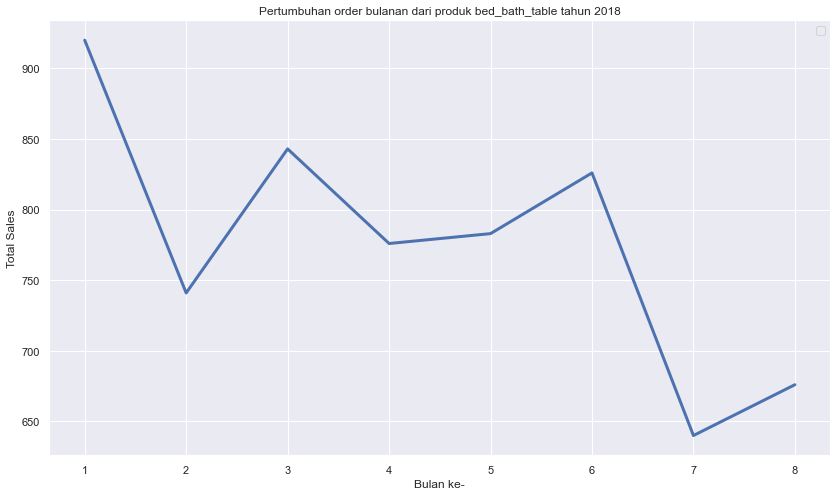

In [1174]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_bed_grouped, x ='month', y = 'sales', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Pertumbuhan order bulanan dari produk bed_bath_table tahun 2018")
plt.ylabel('Total Sales')
plt.xlabel('Bulan ke-')
plt.show()

### 4.5 Pertumbuhan order bulanan dari produk health_beauty tahun 2018

In [1175]:
# Memilih rows yang mengandung bed_bath_table dan order pada tahun 2018 saja
df_beauty = df[(df['product_category_name'] == 'health_beauty') & (df['year'] == 2018)]

In [1176]:
# Berdasarkan visualisasi 4.2 maka akan disimpan lima kategori produk terlaris
df_beauty_grouped = df_beauty[['product_category_name','month','order_id']].groupby(['month']).count().sort_values(by = ['order_id'], ascending = False)
# Mengganti nama kolom
df_beauty_grouped.rename(columns = {'order_id':'sales'}, inplace = True)
df_beauty_grouped

,product_category_name,sales
month,,
6,903,903
8,878,878
7,807,807
5,803,803
4,704,704
3,697,697
2,694,694
1,647,647


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


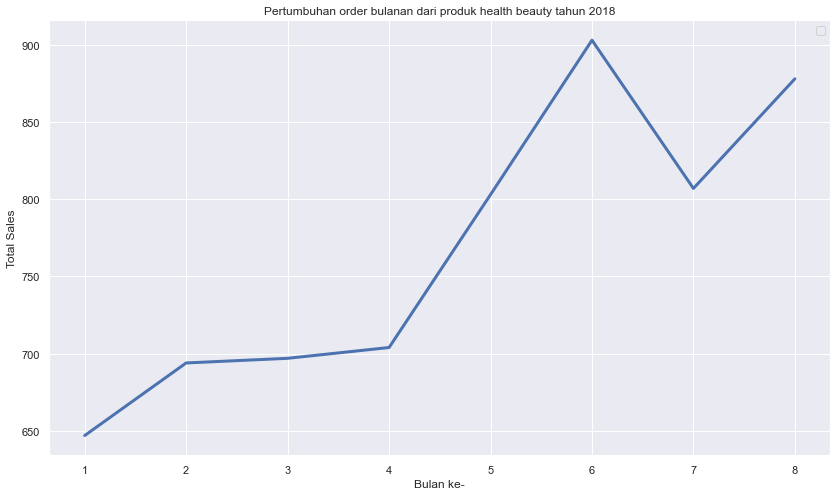

In [1177]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_beauty_grouped, x ='month', y = 'sales', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Pertumbuhan order bulanan dari produk health beauty tahun 2018")
plt.ylabel('Total Sales')
plt.xlabel('Bulan ke-')
plt.show()